In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
#matplotlib figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from mri_project.custom_imports import *

In [2]:
from mri_project.custom_imports import *

In [3]:
files07 = sorted(glob.glob("../data/data/images_with_predictions_v07/*data"))
files06 = sorted(glob.glob("../data/data/images_with_predictions_v06/*data"))
assert len(files07) == len(files06)
assert len(files07) == 832

In [4]:
output_dir = "../data/data/images_with_predictions_v08"

In [5]:
if os.path.exists(output_dir):
    print(f"deleting ${output_dir}")
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

deleting $../data/data/images_with_predictions_v08


../data/data/images_with_predictions_v06/4-COF7B-21_50RepConRaw.data
../data/data/images_with_predictions_v07/4-COF7B-21_50RepConRaw.data


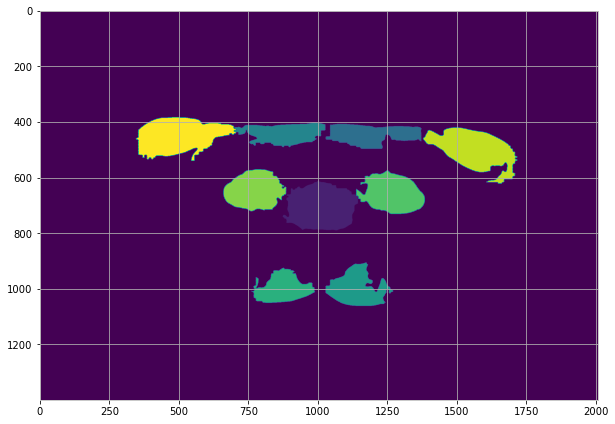

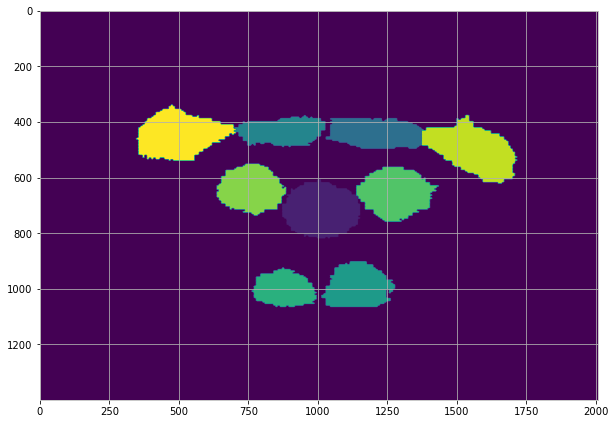

In [120]:
import random
f1, f2 = random.choice(list(zip(files06, files07)))
# ../data/data/images_with_predictions_v06/1-FCWF3-2_16RepPreRaw.data
print(f1)
print(f2)
d1 = joblib.load(f1)
plt.imshow(d1.predicted_postprocessed)
plt.show()
plt.imshow(d1.predicted)

In [121]:
dd1 = break_multi_label_image(d1.predicted_postprocessed)
dd2 = break_multi_label_image(d1.predicted)

In [122]:
for k in dd2:
    print(k, dd1[k].sum()/dd2[k].sum())

0 1.036085838953626
1 0.7979640130374603
4 0.6369277051800319
5 0.7012803902141606
6 0.6695723065345541
7 0.719128125131751
8 0.655699534318688
9 0.7429428156045553
10 0.7332112717553717
11 0.7929495760821063


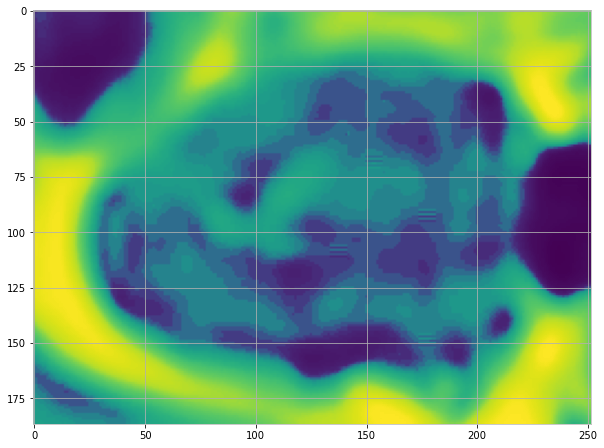

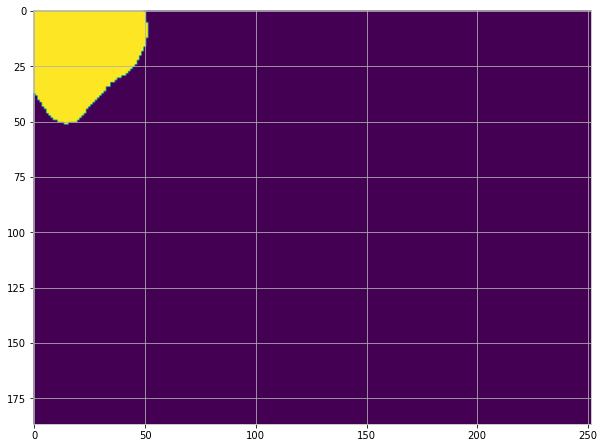

In [126]:
from mri_project.pipeline import get_largest_contour_of_each_color
# plt.imshow(d1.raw_image.sum(2) * (dd2[1]>0))
(y, x) = np.where(dd2[9]>0)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = np.uint8(d1.raw_image.mean(axis=2))[topy-1:bottomy+1, topx-1:bottomx+1]
mout = np.uint8(d1.predicted)[topy-30:bottomy+1, topx-60:bottomx+1]
out = cv2.equalizeHist(out)
plt.imshow(out)
plt.show()
plt.imshow(get_largest_contour_of_each_color(np.uint8(out < out.mean()-out.std())))

# main run

In [22]:
from mri_project.utility import multi_label_image_from_dict, break_multi_label_image
for index, (f1, f2) in enumerate(zip(files06, files07)):
    output_file = f2.replace('_v07', '_v08')
    if index % 40 == 0:
        print(index, output_file)
    d1 = joblib.load(f1)
    d2 = joblib.load(f2)
    new_image_dict1 = break_multi_label_image(d1.predicted_postprocessed, np.uint8)
    new_image_dict2 = break_multi_label_image(d2.predicted_postprocessed, np.uint8)
    for k in new_image_dict1:
        v1 = new_image_dict1[k]
        v2 = new_image_dict2[k]
        ratio = v1.sum()/v2.sum()
        if ratio < .5:
            print(f"ratio for {k} is small")
            new_image_dict1[k] = new_image_dict2[k]
    d2.predicted_postprocessed = multi_label_image_from_dict(new_image_dict1)
    joblib.dump(d2, output_file)

0 ../data/data/images_with_predictions_v08/1-CO1-3_16RawPre.data
ratio for 10 is small
ratio for 10 is small
ratio for 4 is small
ratio for 9 is small
ratio for 10 is small
ratio for 4 is small
ratio for 9 is small
ratio for 10 is small
ratio for 3 is small
ratio for 3 is small
ratio for 4 is small
ratio for 5 is small
ratio for 10 is small
ratio for 4 is small
ratio for 5 is small
ratio for 10 is small
ratio for 4 is small
ratio for 5 is small
ratio for 10 is small
ratio for 11 is small
ratio for 4 is small
ratio for 10 is small
ratio for 4 is small
ratio for 10 is small
ratio for 4 is small
ratio for 10 is small
ratio for 10 is small
ratio for 10 is small
ratio for 4 is small
ratio for 4 is small
ratio for 1 is small
ratio for 4 is small
ratio for 9 is small
ratio for 11 is small
ratio for 2 is small
ratio for 4 is small
ratio for 8 is small
ratio for 9 is small
ratio for 10 is small
ratio for 4 is small
ratio for 5 is small
ratio for 4 is small
ratio for 5 is small
ratio for 4 is sm

ratio for 4 is small
ratio for 5 is small
ratio for 6 is small
ratio for 5 is small
ratio for 6 is small
ratio for 7 is small
ratio for 9 is small
ratio for 5 is small
ratio for 6 is small
ratio for 7 is small
ratio for 9 is small
ratio for 2 is small
ratio for 4 is small
ratio for 5 is small
ratio for 6 is small
ratio for 8 is small
ratio for 9 is small
ratio for 11 is small
ratio for 2 is small
ratio for 4 is small
ratio for 5 is small
ratio for 6 is small
ratio for 8 is small
ratio for 9 is small
ratio for 11 is small
ratio for 2 is small
ratio for 5 is small
ratio for 6 is small
ratio for 7 is small
ratio for 9 is small
ratio for 2 is small
ratio for 5 is small
ratio for 6 is small
ratio for 7 is small
ratio for 9 is small
ratio for 6 is small
ratio for 6 is small
ratio for 3 is small
ratio for 4 is small
ratio for 9 is small
ratio for 3 is small
ratio for 4 is small
ratio for 9 is small
ratio for 5 is small
200 ../data/data/images_with_predictions_v08/1-WM8B-5_50ConRaw.data
ratio 

KeyError: 5